#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score


## Load Dataset

In [3]:
# Read CSV
url = 'https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [5]:
cekDUplikat = df.duplicated().any()
cekDUplikat


True

Periksa apakah ada missing values

In [6]:
df.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Periksa outlier dengan boxplot untuk setiap kolom feature

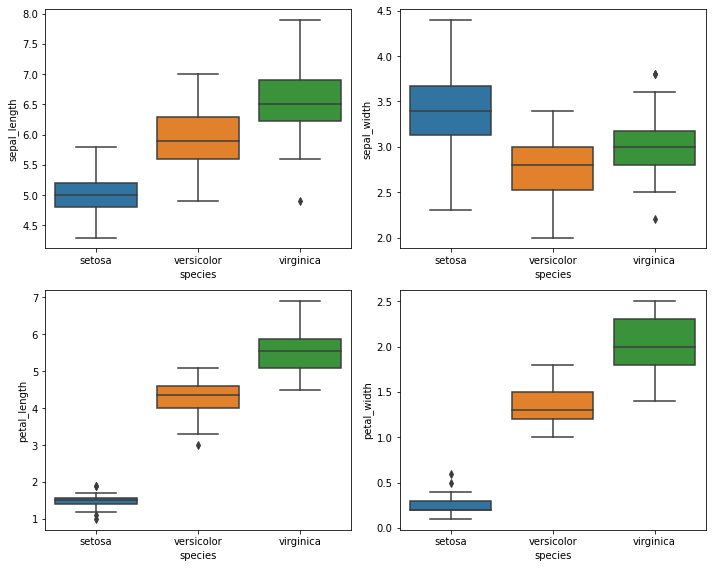

In [7]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.boxplot(data=df, x="species", y="sepal_length")
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x="species", y="sepal_width")
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x="species", y="petal_length")
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x="species", y="petal_width")
plt.tight_layout()
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [8]:
X = df.drop("species", axis=1)
y = df["species"]

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)


Lakukan fitur scaling pada variabel X_train dan X_test. 

In [38]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [39]:
Logreg = LogisticRegression(random_state=0)
Logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

Uji model dengan dataset test

In [40]:
ypred = Logreg.predict(X_test_scaled)
print(ypred)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


In [41]:
ConMat = confusion_matrix(y_test,ypred)
print("Confusion Matrix \n", ConMat)

accuracy = accuracy_score(y_test,ypred)
print("Accuracy Score: ", accuracy)

Confusion Matrix 
 [[3 0 0]
 [0 8 0]
 [0 0 4]]
Accuracy Score:  1.0


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [42]:
modelNB = GaussianNB()
modelNB.fit(X_train_scaled, y_train)

GaussianNB()

Uji hasil model dengan data test

In [43]:
ypredNB = modelNB.predict(X_test_scaled)
print(ypredNB)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [44]:
ConMat = confusion_matrix(y_test,ypredNB)
print("Confusion Matrix \n", ConMat)

accuracy = accuracy_score(y_test,ypredNB)
print("Accuracy Score: ", accuracy)

Confusion Matrix 
 [[3 0 0]
 [0 8 0]
 [0 1 3]]
Accuracy Score:  0.9333333333333333


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [45]:
modelKNN = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
modelKNN.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [46]:
ypredKNN = modelKNN.predict(X_test_scaled)
print(ypred)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


Ukur akurasi dari model K-Nearest Neighbor

In [47]:
ConMat = confusion_matrix(y_test,ypredKNN)
print("Confusion Matrix \n", ConMat)

accuracy = accuracy_score(y_test,ypredKNN)
print("Accuracy Score: ", accuracy)

Confusion Matrix 
 [[3 0 0]
 [0 8 0]
 [0 0 4]]
Accuracy Score:  1.0


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah Logistic regression dan KNN